In [1]:
import h5py
import pandas as pd

In [2]:
preds = h5py.File('lstmvis/proficiency_tests/predictions.hdf5', 'r')

In [3]:
list(preds.keys())

['preds_test', 'true_classes_testset']

In [4]:
dset = preds['preds_test'][()]

In [103]:
dset.shape

(251100,)

In [6]:
prof = preds['true_classes_testset'][()]

In [7]:
prof

array([21, 21, 21, ..., 30, 30, 30])

In [8]:
d = {'proficiency': prof, 'predicted_class': dset}
df = pd.DataFrame(data=d)

In [9]:
df["proficiency"].unique()

array([21, 38, 26, 23, 28, 22, 24, 25, 36, 29, 34, 30, 27, 19, 35, 31, 18,
       37, 14, 39, 32, 13, 20, 17, 40])

In [10]:
df.sort_values(by=["proficiency"])

# sum af pred class for hver categori, len af categori – (sum_pred/len(cat))
proficiencies_count = []
true_count = []
percentage_true = []
for i in df["proficiency"].unique():
    current = df[df["proficiency"]==i]
    first = len(current)
    second = sum(current.predicted_class)
    perc = second/first
    percentage_true.append(perc)
    proficiencies_count.append(first)
    true_count.append(second)

In [11]:
new = pd.DataFrame(data={"proficiency_grade":df["proficiency"].unique(), "true_class_count":true_count, "proficiency_count":proficiencies_count, "percentage": percentage_true})

In [12]:
new.sort_values(by=["proficiency_grade"])

,percentage,proficiency_count,proficiency_grade,true_class_count
21,0.234400,2500,13,586
18,0.447308,2600,14,1163
23,0.423200,2500,17,1058
16,0.413281,6400,18,2645
13,0.588732,7100,19,4180
22,0.468696,4600,20,2156
0,0.448235,6800,21,3048
5,0.391852,8100,22,3174
3,0.376034,17900,23,6731
6,0.418281,19200,24,8031


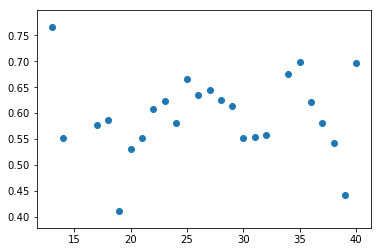

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(new.proficiency_grade, 1-new.percentage)

In [22]:
newdf = new.sort_values(by=["proficiency_grade"]).reset_index()

In [23]:
newdf.drop(labels=[0,1,2,3,4,5,6,7], inplace=True)

In [24]:
newdf

,index,percentage,proficiency_count,proficiency_grade,true_class_count
8,3,0.376034,17900,23,6731
9,6,0.418281,19200,24,8031
10,7,0.333302,21200,25,7066
11,2,0.365642,25700,26,9397
12,12,0.355542,16600,27,5902
13,4,0.375326,9200,28,3453
14,9,0.386011,18800,29,7257
15,11,0.447368,9500,30,4250
16,15,0.445824,9100,31,4057
17,20,0.442241,5800,32,2565


In [36]:
import scipy as sp
from scipy import stats
stats.pearsonr(newdf["percentage"], newdf["proficiency_grade"])

(0.19937869923573168, 0.44296537602694175)

In [104]:
sent_preds = dset.reshape(2511,100)


In [108]:
#pd.DataFrame(sent_preds.mean(axis=0))
#modes, counts = stats.mode(sent_preds, axis=0)
#print(len(modes[0]))

In [109]:
sent_preds

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 0, 0]])

In [110]:
import codecs
import numpy as np
test_lab = codecs.open("data/proficiency/new/proficiency", "r", "utf-8").read().split("\r\n")
test_lab = test_lab[:len(test_lab)-2]

In [111]:
pr = []
ID = []
for i in test_lab:
    s = i.split("\t")
    #print(s[0])
    pr.append(int(np.float(s[0])))
    ID.append(s[1])

In [112]:
len(np.unique(ID))
len(ID)

2511

In [113]:
import nltk
prof_test = codecs.open("data/proficiency/fce_text", "r", "utf-8").read().split("\n")
prof_test = prof_test[:len(prof_test)-2]
test = [nltk.word_tokenize(i.lower()) for i in prof_test]

In [114]:
len(test)

2511

In [115]:
sentence_lengths = []
for i in test:
    sentence_lengths.append(len(i))

In [116]:
actual_predictions_on_words = []
for sample, length in zip(sent_preds, sentence_lengths):
    actual_predictions_on_words.append(sample[:length])

In [117]:
len(actual_predictions_on_words)

2511

In [123]:
all_modes = []
all_true_count = []
for i in actual_predictions_on_words:
    all_modes.append(stats.mode(i)[0][0])
    all_true_count.append(sum(i))

In [124]:
len(all_modes)

2511

In [125]:
new_d_modes = {"mode": all_modes, "all_true_count_in_sentence": all_true_count, 
              "lenght_of_sentence": sentence_lengths, "studentID":ID, "proficiency_grade":pr}

In [126]:
new_df_modes = pd.DataFrame(new_d_modes)

In [127]:
new_df_modes

,all_true_count_in_sentence,lenght_of_sentence,mode,proficiency_grade,studentID
0,19,82,0,21,TE23*0100*2001*01
1,9,34,0,21,TE23*0100*2001*01
2,17,23,1,21,TE23*0100*2001*01
3,28,29,1,21,TE23*0100*2001*01
4,0,3,0,21,TE23*0100*2001*01
5,8,21,0,21,TE23*0100*2001*01
6,12,20,1,21,TE23*0100*2001*01
7,22,23,1,21,TE23*0100*2001*01
8,45,45,1,21,TE23*0100*2001*01
9,12,18,1,21,TE23*0100*2001*01


In [166]:
# sum af pred class for hver categori, len af categori – (sum_pred/len(cat))

prof_grades = []
student_preds = []
ID = []
for i in new_df_modes["studentID"].unique():
    current = new_df_modes[new_df_modes["studentID"]==i]
    number_of_sents_by_student = len(current)
    student_pred = current["mode"]
    #print(student_pred)
    student_preds.append(sum(student_pred)/number_of_sents_by_student)
    prof_grade = sum(current.proficiency_grade)/number_of_sents_by_student
    prof_grades.append(prof_grade)
    ID.append(i)
    
    #first = len(current)
    #second = sum(current.predicted_class)
    #perc = second/first
    #percentage_true.append(perc)
    #proficiencies_count.append(first)
    #true_count.append(second)
d = {"grade":prof_grades, "prediction_percentage":student_preds, "ID": ID}
df = pd.DataFrame(d)
print(len(prof_grades))
print(len(student_preds))
print(len(ID))

97
97
97


In [167]:
df = df.sort_values(by=["grade"]).reset_index()

In [189]:
df = df[(df.grade>22) & (df.grade<40)]
preds_divided_by_students = []
for i in df.grade.unique():
    normed_pred = 1-(sum(df[df.grade==i].prediction_percentage)/len(df[df.grade==i].ID.unique())) #sum of predictions within grade group divieded by number of students.
    preds_divided_by_students.append(normed_pred)

#stats.pearsonr(df["prediction_percentage"], df["grade"])

In [190]:
len(preds_divided_by_students)
len(df.grade.unique())
normed_d = {"preds":preds_divided_by_students, "grade":df.grade.unique()}

In [191]:
pd.DataFrame(normed_d)

,grade,preds
0,23.0,0.495362
1,24.0,0.524902
2,25.0,0.573983
3,26.0,0.584085
4,27.0,0.555063
5,28.0,0.540860
6,29.0,0.494668
7,30.0,0.530193
8,31.0,0.549487
9,32.0,0.452808


In [192]:
stats.pearsonr(df.grade.unique(), preds_divided_by_students)

(-0.1787846810377059, 0.507651804954486)

In [128]:
docscore = codecs.open("data/proficiency/new/docscore", "r", "utf-8").read().split("\n")
docscore = docscore[:len(docscore)-2]

In [129]:
docscore

['3.1\tTE23*0100*2001*01\r',
 '3.1\tTE23*0100*2001*01\r',
 '3.1\tTE23*0100*2001*01\r',
 '3.1\tTE23*0100*2001*01\r',
 '3.1\tTE23*0100*2001*01\r',
 '2.2\tTE23*0100*2001*01\r',
 '2.2\tTE23*0100*2001*01\r',
 '2.2\tTE23*0100*2001*01\r',
 '2.2\tTE23*0100*2001*01\r',
 '2.2\tTE23*0100*2001*01\r',
 '5.1\tTE72*0100*2001*01\r',
 '5.1\tTE72*0100*2001*01\r',
 '5.1\tTE72*0100*2001*01\r',
 '5.1\tTE72*0100*2001*01\r',
 '5.1\tTE72*0100*2001*01\r',
 '5.1\tTE72*0100*2001*01\r',
 '5.1\tTE72*0100*2001*01\r',
 '5.1\tTE72*0100*2001*01\r',
 '5.1\tTE72*0100*2001*01\r',
 '5.1\tTE72*0100*2001*01\r',
 '5.1\tTE72*0100*2001*01\r',
 '5.1\tTE72*0100*2001*01\r',
 '5.3\tTE72*0100*2001*01\r',
 '5.3\tTE72*0100*2001*01\r',
 '5.3\tTE72*0100*2001*01\r',
 '5.3\tTE72*0100*2001*01\r',
 '5.3\tTE72*0100*2001*01\r',
 '5.3\tTE72*0100*2001*01\r',
 '5.3\tTE72*0100*2001*01\r',
 '5.3\tTE72*0100*2001*01\r',
 '5.3\tTE72*0100*2001*01\r',
 '5.3\tTE72*0100*2001*01\r',
 '4.1\tTE70*0100*2001*01\r',
 '4.1\tTE70*0100*2001*01\r',
 '4.1\tTE70*01